In [1]:
histopathology (histo): 조직병리학적 검사를 통해 확인된 진단
follow-up examination (follow_up): 추적 검사를 통해 확인된 진단
expert consensus (consensus): 전문가 합의를 통해 확인된 진단
confirmation by in-vivo confocal microscopy (confocal): 인체 내 현미경을 사용하여 확인된 진단

dx는 진단(diagnosis)을 의미
"dx":

(nv)    Melanocytic nevi (흑색종)                  멜라닌세포모반은 모반세포(점세포, nevus cell, nevomelanocyte)로 이루어진 양성 종양
(mel)   Melanoma (흑색종)                          악성 흑색종은 멜라닌 생성 세포로 구성된 피부 악성 신생물(암)
(bkl)   Benign keratosis-like lesions (양성 각화 유사 병변) 
(bcc)   Basal cell carcinoma (기저세포암)           기저세포 암종은 표피 및 그 부속기 기저부의 비각질화 세포에서 유래한 악성 종양
(akiec) Actinic keratoses (광선각화증)              광선 각화증이란 지속적인 햇빛 노출에 의해 피부에 인설이 동반된 분홍색 또는 적색의 반점이나 구진이 생기는 피부 병변
(vasc)  Vascular lesions (혈관병변)                 피부나 점막에 발생하는 혈관 관련 이상
(df)    Dermatofibroma (피부섬유종)                  진피의 섬유성 종양 모양의 결절.

dx_type은 진단의 유형을 나타냅니다. 각 진단이 어떻게 확인되었는지를 나타냅니다.
"dx_type":

(histo)      histo: 조직 검사 결과를 기반으로 한 진단                                            histopathological(조직학적)
(follow_up)  follow-up examination : 진단 후 추적 관찰                                         follow-up(후행, 추적)
(consensus)  expert consensus: 전문가 그룹의 의견을 바탕으로 한 합의 진단                         consensus(합의)
(confocal)   confirmation by in-vivo confocal microscopy : 조직 검사 대신 피부 조절 현미경 사용  confocal(공초점의)

SyntaxError: illegal target for annotation (4238269756.py, line 1)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
from glob import glob
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, concatenate, Dense, BatchNormalization, Dropout
from keras import backend as K
import itertools

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [3]:
base_skin_dir = os.path.join('.','archive')
#print(base_skin_dir)  --> .\archive

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'HAM10000_images', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
imageid_path_dict
#for dirname, _, filenames in os.walk('./archive'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

{'ISIC_0024306': '.\\archive\\HAM10000_images\\ISIC_0024306.jpg',
 'ISIC_0024307': '.\\archive\\HAM10000_images\\ISIC_0024307.jpg',
 'ISIC_0024308': '.\\archive\\HAM10000_images\\ISIC_0024308.jpg',
 'ISIC_0024309': '.\\archive\\HAM10000_images\\ISIC_0024309.jpg',
 'ISIC_0024310': '.\\archive\\HAM10000_images\\ISIC_0024310.jpg',
 'ISIC_0024311': '.\\archive\\HAM10000_images\\ISIC_0024311.jpg',
 'ISIC_0024312': '.\\archive\\HAM10000_images\\ISIC_0024312.jpg',
 'ISIC_0024313': '.\\archive\\HAM10000_images\\ISIC_0024313.jpg',
 'ISIC_0024314': '.\\archive\\HAM10000_images\\ISIC_0024314.jpg',
 'ISIC_0024315': '.\\archive\\HAM10000_images\\ISIC_0024315.jpg',
 'ISIC_0024316': '.\\archive\\HAM10000_images\\ISIC_0024316.jpg',
 'ISIC_0024317': '.\\archive\\HAM10000_images\\ISIC_0024317.jpg',
 'ISIC_0024318': '.\\archive\\HAM10000_images\\ISIC_0024318.jpg',
 'ISIC_0024319': '.\\archive\\HAM10000_images\\ISIC_0024319.jpg',
 'ISIC_0024320': '.\\archive\\HAM10000_images\\ISIC_0024320.jpg',
 'ISIC_002

In [4]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [5]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\archive\HAM10000_images\ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [6]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [7]:
#skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)
skin_df.fillna({'age': skin_df['age'].mean()}, inplace=True)

In [8]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [9]:
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


<Axes: xlabel='cell_type'>

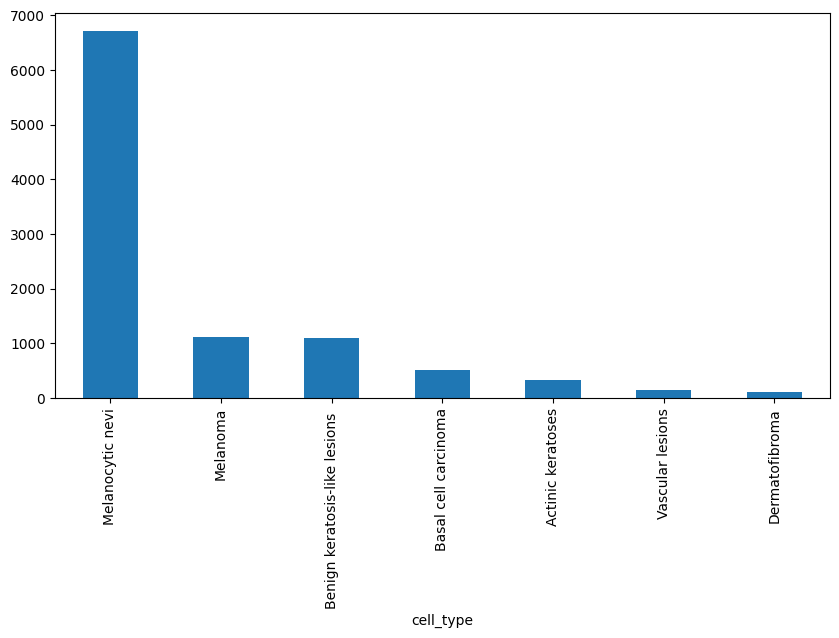

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
print(skin_df['dx'].value_counts())
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [11]:
from PIL import Image
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100, 100))))

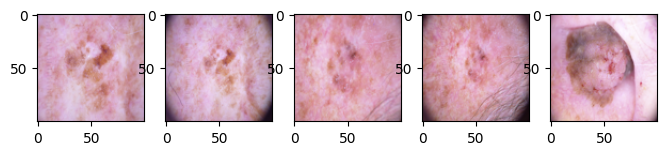

In [12]:
plt.figure(figsize=(8, 6))
for i in range(5):
  plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스|
  plt.imshow(skin_df['image'][i])
plt.show()

In [13]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[190, 153, 195], [192, 155, 197], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[24, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 128, 137], [190, 134, 148], [194, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 17], [25, 12, 22], [36, 21, 30], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\archive\HAM10000_images\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[132, 89, 112], [146, 101, 124], [158, 114, ..."


In [14]:
nv_skin_df = skin_df[skin_df['dx'] == 'nv'] #6705
mel_skin_df = skin_df[skin_df['dx'] == 'mel'] #1113
bkl_skin_df = skin_df[skin_df['dx'] == 'bkl'] #1099
bcc_skin_df = skin_df[skin_df['dx'] == 'bcc'] #514
akiec_skin_df = skin_df[skin_df['dx'] == 'akiec'] #327
vasc_skin_df = skin_df[skin_df['dx'] == 'vasc'] #142
df_skin_df = skin_df[skin_df['dx'] == 'df'] #115
df_skin_df['image'].shape

(115,)

In [15]:
# Data Augmentation on train set 
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [16]:
df_skin_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path', 'cell_type', 'cell_type_idx', 'image'],
      dtype='object')

In [17]:
nv_skin_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path', 'cell_type', 'cell_type_idx', 'image'],
      dtype='object')

In [18]:
# nv
augmented_nv = pd.DataFrame(columns=nv_skin_df.columns)  # 기존 데이터프레임과 동일한 열을 가지는 새로운 데이터프레임 생성

multi = 2

# 배열 채우기, 훈련 데이터에서 한 장씩 꺼내 multi 개씩 만듭니다.
for i in range(len(nv_skin_df)):
    # 이미지와 관련된 메타데이터 가져오기
    image_row = nv_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')  # 이미지 열 제외한 메타데이터 추출

    # 각 이미지와 관련된 메타데이터를 multi 만큼 복사하여 새로운 데이터프레임에 추가
    for j in range(multi):
        augmented_image = datagen.random_transform(image)  # 이미지 증강
        
        # 증강된 이미지와 원본 이미지의 메타데이터를 새로운 행으로 추가
        augmented_metadata = metadata.copy()  # 메타데이터를 복사하여 수정된 이미지와 함께 추가
        augmented_metadata['image'] = augmented_image  # 이미지 열에 증강된 이미지 추가
        augmented_nv.loc[i*multi + j] = augmented_metadata


# 결과 확인
augmented_nv.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face,.\archive\HAM10000_images\ISIC_0024698.jpg,Melanocytic nevi,4,"[[[161, 138, 156], [162, 139, 158], [164, 139,..."
1,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face,.\archive\HAM10000_images\ISIC_0024698.jpg,Melanocytic nevi,4,"[[[169, 148, 168], [168, 149, 170], [168, 148,..."
2,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity,.\archive\HAM10000_images\ISIC_0024693.jpg,Melanocytic nevi,4,"[[[220, 150, 158], [220, 150, 158], [220, 151,..."
3,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity,.\archive\HAM10000_images\ISIC_0024693.jpg,Melanocytic nevi,4,"[[[216, 149, 154], [217, 150, 154], [218, 150,..."
4,HAM_0004932,ISIC_0032212,nv,follow_up,45.0,female,foot,.\archive\HAM10000_images\ISIC_0032212.jpg,Melanocytic nevi,4,"[[[219, 149, 140], [219, 149, 140], [219, 149,..."


In [19]:
# mel 1113
augmented_mel = pd.DataFrame(columns=mel_skin_df.columns)

multi = 4

for i in range(len(mel_skin_df)):
    image_row = mel_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')

    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        augmented_metadata = metadata.copy()
        augmented_metadata['image'] = augmented_image 
        augmented_mel.loc[i*multi + j] = augmented_metadata

augmented_mel.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest,.\archive\HAM10000_images\ISIC_0025964.jpg,Melanoma,5,"[[[179, 153, 159], [182, 155, 161], [184, 157,..."
1,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest,.\archive\HAM10000_images\ISIC_0025964.jpg,Melanoma,5,"[[[194, 169, 179], [196, 169, 181], [197, 173,..."
2,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest,.\archive\HAM10000_images\ISIC_0025964.jpg,Melanoma,5,"[[[121, 106, 115], [139, 124, 133], [153, 137,..."
3,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest,.\archive\HAM10000_images\ISIC_0025964.jpg,Melanoma,5,"[[[190, 172, 176], [193, 175, 179], [193, 175,..."
4,HAM_0000871,ISIC_0030623,mel,histo,40.0,female,chest,.\archive\HAM10000_images\ISIC_0030623.jpg,Melanoma,5,"[[[201, 172, 189], [201, 172, 189], [201, 172,..."


In [20]:
# bkl
# 1099

augmented_bkl = pd.DataFrame(columns=bkl_skin_df.columns) 

multi = 4

for i in range(len(bkl_skin_df)):
    image_row = bkl_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')
    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        augmented_metadata = metadata.copy()
        augmented_metadata['image'] = augmented_image
        augmented_bkl.loc[i*multi + j] = augmented_metadata

augmented_bkl.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[190, 151, 172], [196, 156, 179], [196, 159,..."
1,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[188, 133, 148], [188, 134, 151], [191, 136,..."
2,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[211, 166, 208], [211, 167, 209], [205, 164,..."
3,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[192, 159, 189], [192, 159, 190], [192, 160,..."
4,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[177, 129, 144], [179, 129, 144], [183, 132,..."


In [21]:
# bcc
#514

augmented_bcc = pd.DataFrame(columns=bcc_skin_df.columns)

multi = 6

for i in range(len(bcc_skin_df)):
    image_row = bcc_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')

    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        augmented_metadata = metadata.copy()
        augmented_metadata['image'] = augmented_image 
        augmented_bcc.loc[i*multi + j] = augmented_metadata

augmented_bcc.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,.\archive\HAM10000_images\ISIC_0028155.jpg,Basal cell carcinoma,1,"[[[51, 36, 38], [50, 34, 39], [52, 34, 40], [5..."
1,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,.\archive\HAM10000_images\ISIC_0028155.jpg,Basal cell carcinoma,1,"[[[204, 162, 160], [213, 176, 174], [218, 186,..."
2,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,.\archive\HAM10000_images\ISIC_0028155.jpg,Basal cell carcinoma,1,"[[[71, 53, 60], [68, 50, 57], [65, 48, 55], [6..."
3,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,.\archive\HAM10000_images\ISIC_0028155.jpg,Basal cell carcinoma,1,"[[[16, 11, 10], [17, 11, 11], [17, 10, 11], [1..."
4,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,.\archive\HAM10000_images\ISIC_0028155.jpg,Basal cell carcinoma,1,"[[[77, 65, 74], [71, 59, 68], [64, 53, 62], [5..."


In [22]:
# akiec
# 327

augmented_akiec = pd.DataFrame(columns=akiec_skin_df.columns) 

multi = 8

for i in range(len(akiec_skin_df)):
    image_row = akiec_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')

    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        
        augmented_metadata = metadata.copy()
        augmented_metadata['image'] = augmented_image 
        augmented_akiec.loc[i*multi + j] = augmented_metadata

augmented_akiec.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,.\archive\HAM10000_images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[56, 31, 40], [56, 31, 40], [56, 31, 40], [5..."
1,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,.\archive\HAM10000_images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[85, 56, 68], [102, 69, 80], [115, 80, 83], ..."
2,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,.\archive\HAM10000_images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[96, 65, 73], [107, 77, 81], [118, 88, 90], ..."
3,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,.\archive\HAM10000_images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[73, 43, 49], [77, 45, 53], [79, 47, 55], [8..."
4,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,.\archive\HAM10000_images\ISIC_0029417.jpg,Actinic keratoses,0,"[[[56, 30, 39], [56, 30, 39], [55, 30, 39], [5..."


In [23]:
# vasc
# 142

augmented_vasc = pd.DataFrame(columns=vasc_skin_df.columns) 

multi = 12

for i in range(len(vasc_skin_df)):
    # 이미지와 관련된 메타데이터 가져오기
    image_row = vasc_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image') 

    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        augmented_metadata = metadata.copy() 
        augmented_metadata['image'] = augmented_image
        augmented_vasc.loc[i*multi + j] = augmented_metadata

        augmented_vasc.head()

In [24]:
# df
# 115

augmented_df = pd.DataFrame(columns=df_skin_df.columns)
multi = 12

for i in range(len(df_skin_df)):
    image_row = df_skin_df.iloc[i]
    image = image_row['image']
    metadata = image_row.drop('image')
    for j in range(multi):
        augmented_image = datagen.random_transform(image)
        augmented_metadata = metadata.copy()
        augmented_metadata['image'] = augmented_image 
        augmented_df.loc[i*multi + j] = augmented_metadata

augmented_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,.\archive\HAM10000_images\ISIC_0027008.jpg,Dermatofibroma,3,"[[[165, 122, 110], [172, 126, 112], [182, 134,..."
1,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,.\archive\HAM10000_images\ISIC_0027008.jpg,Dermatofibroma,3,"[[[205, 163, 164], [200, 153, 150], [202, 149,..."
2,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,.\archive\HAM10000_images\ISIC_0027008.jpg,Dermatofibroma,3,"[[[79, 49, 53], [79, 49, 53], [79, 49, 53], [7..."
3,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,.\archive\HAM10000_images\ISIC_0027008.jpg,Dermatofibroma,3,"[[[183, 138, 130], [183, 138, 130], [184, 139,..."
4,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,.\archive\HAM10000_images\ISIC_0027008.jpg,Dermatofibroma,3,"[[[216, 175, 186], [215, 170, 169], [209, 156,..."


In [25]:
print(type(augmented_df.iloc[0]['image']))


<class 'numpy.ndarray'>


In [26]:
import pandas as pd
# nv       6705
# mel      1113
# bkl      1099
# bcc       514
# akiec     327
# vasc      142
# df        115
# skin_df와 augmented_df를 병합하여 새로운 DataFrame 생성
merged_df = pd.concat([skin_df, augmented_mel, augmented_bkl, augmented_bcc, augmented_akiec, augmented_vasc, augmented_df], ignore_index=True)

# 결과 확인
merged_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[190, 153, 195], [192, 155, 197], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[24, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 128, 137], [190, 134, 148], [194, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 17], [25, 12, 22], [36, 21, 30], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\archive\HAM10000_images\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[132, 89, 112], [146, 101, 124], [158, 114, ..."


In [27]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12817008426802505743
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6278873088
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16794393968053121543
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

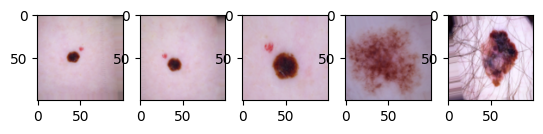

In [28]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_mel.iloc[i*3]['image'].astype('float32') / 255)
plt.show()

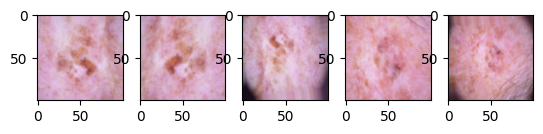

In [29]:
for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_bkl.iloc[i*3]['image'].astype('float32') / 255)
plt.show()

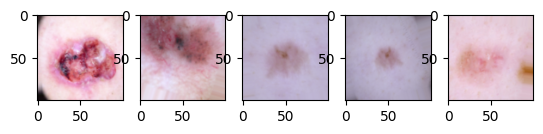

In [30]:
for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_bcc.iloc[i*6]['image'].astype('float32') / 255)
plt.show()


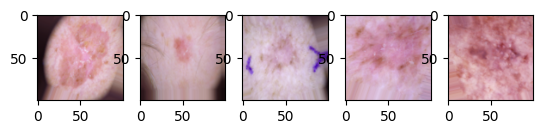

In [31]:
for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_akiec.iloc[i*8]['image'].astype('float32') / 255)
plt.show()


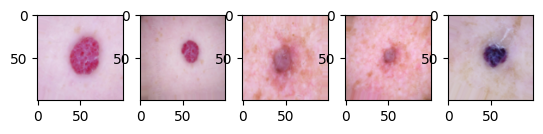

In [32]:
for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_vasc.iloc[i*14]['image'].astype('float32') / 255)
plt.show()


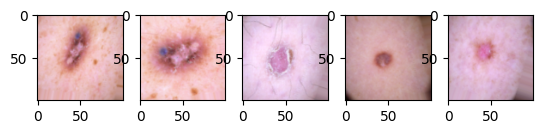

In [33]:
for i in range(5):
    plt.subplot(1,5,i+1) # 행 하나, 열 다섯 개, 1로 시작하는 인덱스
    # 이미지 데이터를 부동 소수점으로 변환하여 픽셀 값을 0에서 1 사이로 만듭니다.
    plt.imshow(augmented_df.iloc[i*20]['image'].astype('float32') / 255)
plt.show()


In [34]:
# Checking the image size distribution
merged_df['image'].map(lambda x: x.shape).value_counts()

image
(100, 100, 3)    27647
Name: count, dtype: int64

In [35]:
merged_df.shape[0]

27647

In [36]:
# 이미지 정규화
for i in range(merged_df.shape[0]):
    merged_df.at[i, 'image'] = merged_df.at[i, 'image'].astype('float32') / 255 


In [37]:
# 나이 Min-Max 정규화

min_age = merged_df['age'].min()
max_age = merged_df['age'].max()

# Min-Max 정규화 수행
merged_df['normalized_age'] = (merged_df['age'] - min_age) / (max_age - min_age)

merged_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image,normalized_age
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[0.74509805, 0.6, 0.7647059], [0.7529412, 0....",0.941176
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[0.09411765, 0.050980393, 0.08627451], [0.09...",0.941176
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[0.7294118, 0.5019608, 0.5372549], [0.745098...",0.941176
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,.\archive\HAM10000_images\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[0.09411765, 0.043137256, 0.06666667], [0.09...",0.941176
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,.\archive\HAM10000_images\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[0.5176471, 0.34901962, 0.4392157], [0.57254...",0.882353


In [38]:
inputs = merged_df[['normalized_age', 'sex', 'localization', 'image']]
labels=merged_df['cell_type_idx']
inputs.head()

,normalized_age,sex,localization,image
0,0.941176,male,scalp,"[[[0.74509805, 0.6, 0.7647059], [0.7529412, 0...."
1,0.941176,male,scalp,"[[[0.09411765, 0.050980393, 0.08627451], [0.09..."
2,0.941176,male,scalp,"[[[0.7294118, 0.5019608, 0.5372549], [0.745098..."
3,0.941176,male,scalp,"[[[0.09411765, 0.043137256, 0.06666667], [0.09..."
4,0.882353,male,ear,"[[[0.5176471, 0.34901962, 0.4392157], [0.57254..."


In [39]:
labels.head()

0    2
1    2
2    2
3    2
4    2
Name: cell_type_idx, dtype: object

In [40]:
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2,random_state=1234)

In [41]:
inputs['image'][0].shape

(100, 100, 3)

In [42]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [43]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [44]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
#x_train = x_train.reshape(x_train.shape[0], *(60, 80, 3))
#x_test = x_test.reshape(x_test.shape[0], *(60, 80, 3))
#x_validate = x_validate.reshape(x_validate.shape[0], *(60, 80, 3))
#x_train.iloc[15180]['image'].shape


In [64]:
from tensorflow.keras.layers import Input, Flatten, concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet

# 이미지 입력 레이어
image_input = Input(shape=(100, 100, 3), name='image_input')

# MobileNet 모델 로드 (include_top=False로 설정하여 Fully Connected 레이어를 제외)
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))(image_input)

# MobileNet의 출력을 Flatten
mobilenet_flatten = Flatten()(mobilenet_base)

# 나이 입력 레이어
age_input = Input(shape=(1,), name='age_input')

# 성별 입력 레이어
sex_input = Input(shape=(3,), name='sex_input')

# 발병위치 입력 레이어
localization_input = Input(shape=(15,), name='localization_input')

# 모든 입력을 결합하는 레이어
combined_input = concatenate([mobilenet_flatten, age_input, sex_input, localization_input])

# Fully Connected Layer
dense1 = Dense(64, activation='relu')(combined_input)
dropout2 = Dropout(0.3)(dense1)  # 드롭아웃 비율 감소
dense2 = Dense(32, activation='relu')(dropout2)

# 출력 레이어 (다중 클래스 분류)
output = Dense(7, activation='softmax')(dense2)  

# 모델 정의
model = Model(inputs=[image_input, age_input, sex_input, localization_input], outputs=output)


# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 3, 3, 1024)  3228864     ['image_input[0][0]']            
 )                                                                                                
                                                                                                  
 flatten_1 (Flatten)            (None, 9216)         0           ['mobilenet_1.00_224[0][0]']     
                                                                                            

In [46]:
from tensorflow.keras.utils import to_categorical

X_train_image = x_train['image']
X_train_age = x_train['normalized_age']
X_train_sex = x_train['sex']
X_train_localization = x_train['localization']

X_test_image = x_test['image']
X_test_age = x_test['normalized_age']
X_test_sex = x_test['sex']
X_test_localization = x_test['localization']

X_validate_image = x_validate['image']
X_validate_age = x_validate['normalized_age']
X_validate_sex = x_validate['sex']
X_validate_localization = x_validate['localization']

# y_train은 위에서 원-핫 인코딩 이미 해줌

In [47]:
print(type(X_train_image))
print(type(X_train_age))
print(type(X_train_sex))
print(type(X_train_localization))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 먼저 레이블 인코딩(Label Encoding)을 수행하여 카테고리를 숫자로 변환합니다.
label_encoder_sex = LabelEncoder()
onehot_encoder_sex = OneHotEncoder()

train_labels_sex = label_encoder_sex.fit_transform(X_train_sex)
X_train_sex_one_hot = onehot_encoder_sex.fit_transform(train_labels_sex.reshape(-1, 1))

test_labels_sex = label_encoder_sex.fit_transform(X_test_sex)
X_test_sex_one_hot = onehot_encoder_sex.fit_transform(test_labels_sex.reshape(-1, 1))

validate_labels_sex = label_encoder_sex.fit_transform(X_validate_sex)
X_validate_sex_one_hot = onehot_encoder_sex.fit_transform(validate_labels_sex.reshape(-1, 1))

print(X_train_sex_one_hot.shape)
print(X_test_sex_one_hot.shape)
print(X_validate_sex_one_hot.shape)

(19905, 3)
(5530, 3)
(2212, 3)


In [49]:
print(type(X_train_sex_one_hot))

<class 'scipy.sparse._csr.csr_matrix'>


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 먼저 레이블 인코딩(Label Encoding)을 수행하여 카테고리를 숫자로 변환합니다.
label_encoder_localization = LabelEncoder()
onehot_encoder_localization = OneHotEncoder()

localization_train_labels = label_encoder_localization.fit_transform(X_train_localization)
X_train_localization_one_hot = onehot_encoder_localization.fit_transform(localization_train_labels.reshape(-1, 1))

localization_test_labels = label_encoder_localization.fit_transform(X_test_localization)
X_test_localization_one_hot = onehot_encoder_localization.fit_transform(localization_test_labels.reshape(-1, 1))

localization_validate_labels = label_encoder_localization.fit_transform(X_validate_localization)
X_validate_localization_one_hot = onehot_encoder_localization.fit_transform(localization_validate_labels.reshape(-1, 1))

print(X_train_localization_one_hot.shape)
print(X_test_localization_one_hot.shape)
print(X_validate_localization_one_hot.shape)

(19905, 15)
(5530, 15)
(2212, 14)


In [51]:
print(y_train.shape)
print(type(y_train))

(19905, 7)
<class 'numpy.ndarray'>


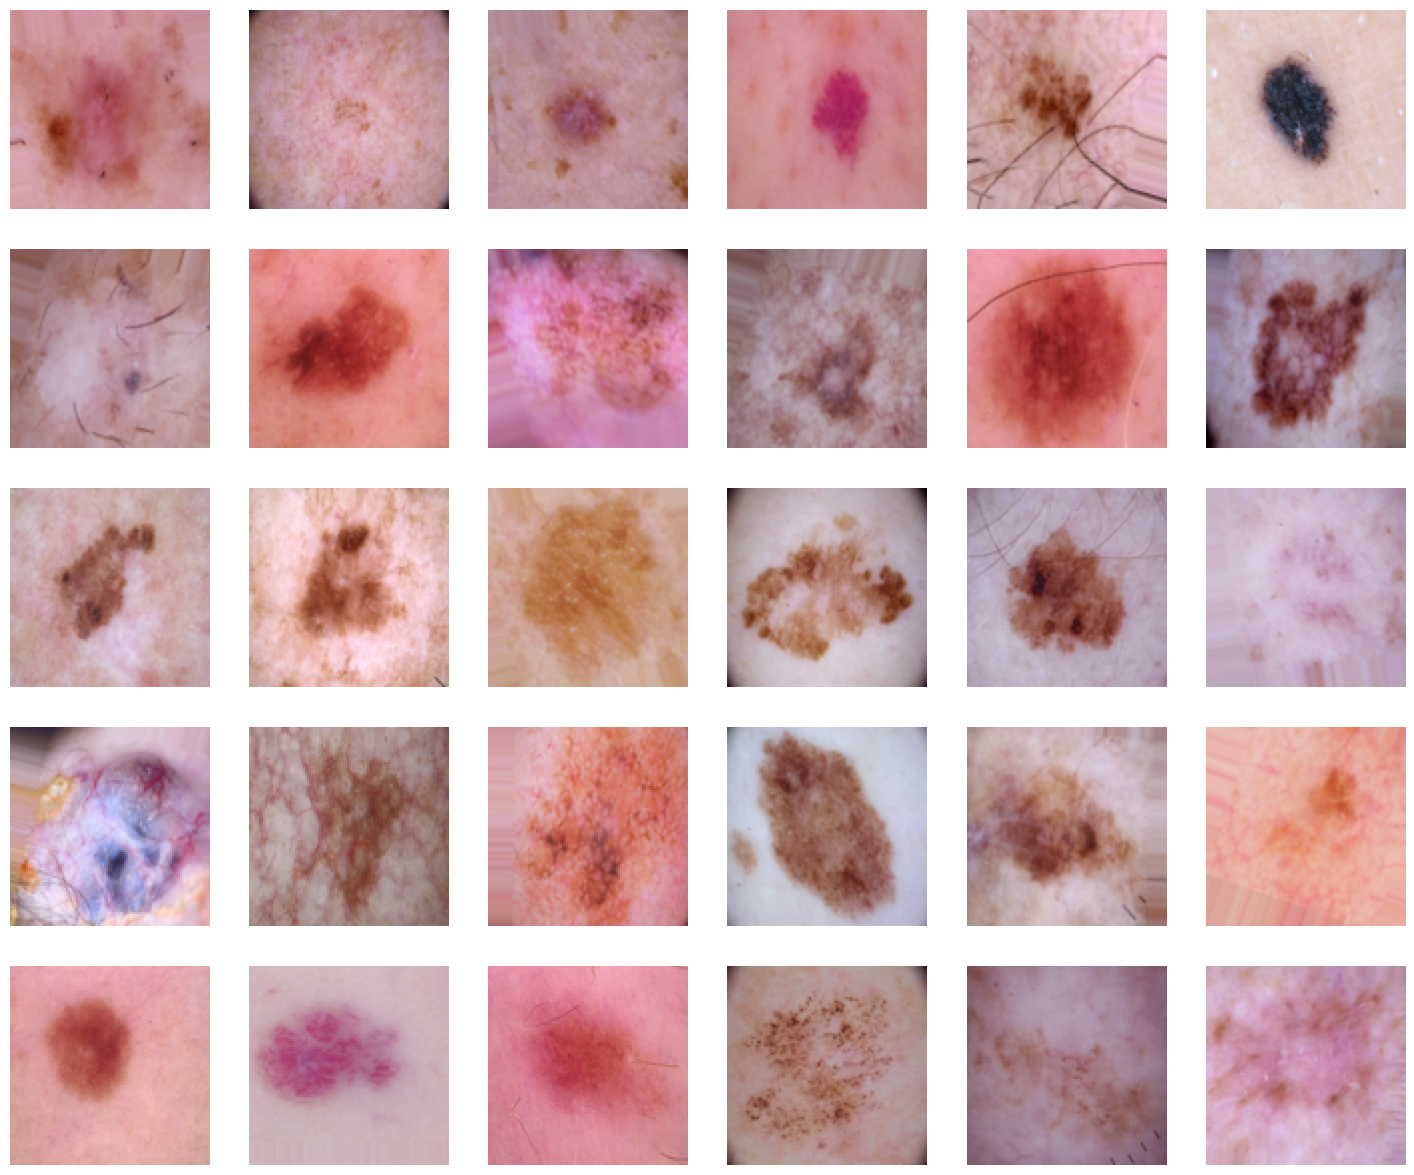

In [52]:
import matplotlib.pyplot as plt
import random

# 이미지 데이터 중에서 랜덤으로 30개 선택
random_images = random.sample(merged_df['image'].tolist(), 30)

# 선택된 이미지 시각화
fig, axes = plt.subplots(5, 6, figsize=(18, 15))

for i, image in enumerate(random_images):
    ax = axes[i // 6, i % 6]  # subplot 인덱스 계산
    ax.imshow(image)
    ax.axis('off')

plt.show()


In [53]:
import numpy as np

# 이미지 데이터를 넘파이 배열로 변환
X_train_image_np = np.array([np.array(image) for image in X_train_image])
X_test_image_np = np.array([np.array(image) for image in X_test_image])
X_validate_image_np = np.array([np.array(image) for image in X_validate_image])

In [54]:
X_train_age_np = np.array([np.array(age) for age in X_train_age])
X_test_age_np = np.array([np.array(age) for age in X_test_age])
X_validate_age_np = np.array([np.array(age) for age in X_validate_age])

In [55]:
X_train_sex_one_hot_np = X_train_sex_one_hot.toarray()
X_test_sex_one_hot_np = X_test_sex_one_hot.toarray()
X_validate_sex_one_hot_np = X_validate_sex_one_hot.toarray()

print("이미지 데이터의 형태:", X_train_sex_one_hot_np.shape)
print("이미지 데이터의 타입:", type(X_train_sex_one_hot_np))

이미지 데이터의 형태: (19905, 3)
이미지 데이터의 타입: <class 'numpy.ndarray'>


In [56]:
X_train_localization_one_hot_np = X_train_localization_one_hot.toarray()
X_test_localization_one_hot_np = X_test_localization_one_hot.toarray()
X_validate_localization_one_hot_np = X_validate_localization_one_hot.toarray()

print("이미지 데이터의 형태:", X_train_localization_one_hot_np.shape)
print("이미지 데이터의 타입:", type(X_train_localization_one_hot_np))

이미지 데이터의 형태: (19905, 15)
이미지 데이터의 타입: <class 'numpy.ndarray'>


In [57]:
print("이미지 데이터의 형태:", y_train.shape)
print("이미지 데이터의 타입:", type(y_train))

이미지 데이터의 형태: (19905, 7)
이미지 데이터의 타입: <class 'numpy.ndarray'>


In [58]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

In [65]:
print("이미지 데이터의 타입:", type(X_train_image_np))
print("이미지 데이터의 타입:", type(X_train_age_np))
print("이미지 데이터의 타입:", type(X_train_sex_one_hot_np))
print("이미지 데이터의 타입:", type(X_train_localization_one_hot_np))
print("이미지 데이터의 타입:", type(y_train))


# 모델을 훈련시킴
history = model.fit([X_train_image_np, X_train_age_np, X_train_sex_one_hot_np, X_train_localization_one_hot_np], y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction])

이미지 데이터의 타입: <class 'numpy.ndarray'>
이미지 데이터의 타입: <class 'numpy.ndarray'>
이미지 데이터의 타입: <class 'numpy.ndarray'>
이미지 데이터의 타입: <class 'numpy.ndarray'>
이미지 데이터의 타입: <class 'numpy.ndarray'>
Epoch 1/30
249/249 [==============================] - 16s 54ms/step - loss: 1.2955 - accuracy: 0.5357 - val_loss: 1.1100 - val_accuracy: 0.6433 - lr: 0.0010
Epoch 2/30
249/249 [==============================] - 12s 47ms/step - loss: 0.9321 - accuracy: 0.6608 - val_loss: 0.9359 - val_accuracy: 0.6451 - lr: 0.0010
Epoch 3/30
249/249 [==============================] - 12s 47ms/step - loss: 0.7861 - accuracy: 0.7191 - val_loss: 0.7160 - val_accuracy: 0.7551 - lr: 0.0010
Epoch 4/30
249/249 [==============================] - 12s 47ms/step - loss: 0.6880 - accuracy: 0.7554 - val_loss: 0.7307 - val_accuracy: 0.7631 - lr: 0.0010
Epoch 5/30
249/249 [==============================] - 12s 47ms/step - loss: 0.6055 - accuracy: 0.7855 - val_loss: 0.6776 - val_accuracy: 0.7687 - lr: 0.0010
Epoch 6/30
249/249 [==========

In [60]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    #axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1, len(model_history.history['accuracy']) / 10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

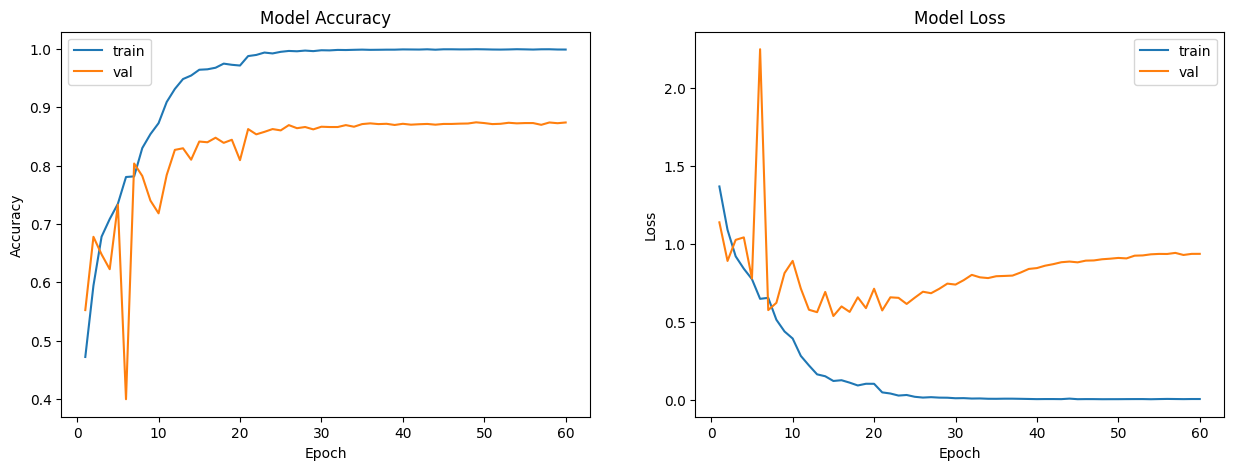

In [61]:
plot_model_history(history)

In [62]:
loss, accuracy = model.evaluate([X_test_image_np, X_test_age_np, X_test_sex_one_hot_np, X_test_localization_one_hot_np], y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

173/173 [==============================] - 2s 10ms/step - loss: 0.9115 - accuracy: 0.8673
Test: accuracy = 0.867269  ;  loss = 0.911544


In [63]:

y_validate = to_categorical(y_validate, num_classes = 7)
loss_v, accuracy_v = model.evaluate([X_validate_image_np, X_validate_age_np, X_validate_sex_one_hot_np, X_validate_localization_one_hot_np], y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))

InvalidArgumentError: Graph execution error:

Detected at node 'model/dense/MatMul' defined at (most recent call last):
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\csw\AppData\Local\Temp\ipykernel_34888\4287774309.py", line 2, in <module>
      loss_v, accuracy_v = model.evaluate([X_validate_image_np, X_validate_age_np, X_validate_sex_one_hot_np, X_validate_localization_one_hot_np], y_validate, verbose=1)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'model/dense/MatMul'
Detected at node 'model/dense/MatMul' defined at (most recent call last):
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\csw\AppData\Local\Temp\ipykernel_34888\4287774309.py", line 2, in <module>
      loss_v, accuracy_v = model.evaluate([X_validate_image_np, X_validate_age_np, X_validate_sex_one_hot_np, X_validate_localization_one_hot_np], y_validate, verbose=1)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\csw\anaconda3\envs\DeepLearningTeamProject\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'model/dense/MatMul'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Matrix size-incompatible: In[0]: [32,9234], In[1]: [9235,64]
	 [[{{node model/dense/MatMul}}]]
	 [[categorical_crossentropy/cond/then/_0/categorical_crossentropy/cond/cond/pivot_t/_54/_83]]
  (1) INVALID_ARGUMENT:  Matrix size-incompatible: In[0]: [32,9234], In[1]: [9235,64]
	 [[{{node model/dense/MatMul}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_159719]